# CAMELS Multifield Dataset

In this project you will analyse simulated datasets from the Cosmology and Astrophysics with MachinE Learning Simulations (CAMELS) Multifield Dataset, CMD, to attempt to determine the fundamental parameters of the universe.

The CAMELS CMD simualted dataset is enormous so in this project we will only be using one small corner of the simulated data. You can find more details on the overall [CAMELS Multifield Dataset in their paper on arxiv](https://arxiv.org/abs/2109.10915).


## Cosmological parameters

Each map in the dataset comes from a simulation which is controlled by six parameters. Two of these are interesting cosmological parameters that we want to determine, whilst the other four parameters are effective parameters that we are less interested in but might need to consider to determine the interesting cosmological parameters.

| Variable      | Description |
| ----------- | ----------- |
| $\Omega_m$      | This is a cosmological parameter that represents the fraction of matter in the Universe.   |
| $\sigma_8$      | his is a cosmological parameter that controls the smoothness of the distribution of matter in the Universe  |
| $A_{SN1}$ & $A_{SN2}$     | These are two astrophysical parameters that controls two properties of supernova feedback  |
| $A_{AGN1}$ & $A_{AGN2}$     | These are two astrophysical parameters that control two properties of black-hole feedback|

## Types of 2D-Map

The simulated datasets are for a large number of astrophysical fields including

| Field   | Prefix   |
| ----------- | ---- |
| Gas density     | Mgas |
| Gas velocity    | Vgas |
| Gas temperature | T |
| Gas metallicity    | Z |
| Neutral hydrogen density    | HI |
| Electron number density    | ne |
| Magnetic fields   | B |
| Magnesium over Iron   | MgFe |
| Dark matter density  | Mcdm |
| Dark matter velocity  | Vcdm |
| Stellar mass density | Mstar |  
| Total matter density | Mtot |

There are several different types of datasets avalible deriving from different simulations and with different ways of varying the astrophysical parameters. In this miniproject we will confine ourselves to look only at the IllustrisTNG simulation where a single astrophysical parameter is varied at a time.

## Machine learning tasks

1. Train a machine learning algorithm to predict the cosmological parameters from a single map
2. Train a machine learning algorithm to predict the cosmological parameters from multiple maps (e.g. of different fields at the same time)

## Potential extensions

1. Train a machine learning algortithm on one field and use it to predict the cosmological parameters on other fields
2. Train a generative algorithm that is able to take a map of one field and produce a map of another, are there particular fields that are good or bad at predicting other fields?

## Things to remember
In the '1P' dataset that we have downloaded a single parameter is varied at a time. For each set of parameters there are 15 images. So 66 parameter combinations result in 990 images of each field.

Questions:
* What type of data preprocessing will be needed?
* How will you split the data in to train, validation and test samples?



#Introduction:

First, we'll download necessary files from a remote server using the urllib library and handle file operations with the os library. The files include 2D maps of astrophysical fields and a label file containing parameters associated with the maps. These files are part of the Cosmology and Astrophysics with Machine Learning Simulations (CAMELS) Multifield Dataset (CMD) project [1].

The primary purpose of this code is to ensure that the required files are available locally for subsequent analysis and processing in the project.


In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  #Needed for plotting things on log scale

In [2]:
# Importing necessary libraries
import urllib.request  # Library for handling URL requests
import os  # Library for interacting with the operating system

# File names for the label file and 2D map files
labelFile='params_1P_IllustrisTNG.txt'  # File containing parameters
firstFile='Maps_B_IllustrisTNG_1P_z=0.00.npy'  # File for the first astrophysical field
secondFile='Maps_Z_IllustrisTNG_1P_z=0.00.npy'  # File for the second astrophysical field
thirdFile='Maps_Mgas_IllustrisTNG_1P_z=0.00.npy'  # File for the third astrophysical field

# Function to download the file if not present
def getFile(fileName):
    """
    Downloads a file from a given URL if it's not already present locally.

    Args:
    fileName (str): Name of the file to be downloaded.

    Returns:
    None
    """
    # Copy a network object to a local file
    urllib.request.urlretrieve('https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/'+fileName, fileName)

# Download the file if not present locally

if not os.path.isfile(firstFile):
    getFile(firstFile)

if not os.path.isfile(secondFile):
    getFile(secondFile)

if not os.path.isfile(thirdFile):
    getFile(thirdFile)

if not os.path.isfile(labelFile):
    getFile(labelFile)

Now, we load the label file and the first 2D map file from the CAMELS Multifield Dataset (CMD) project. We then perform some preliminary analysis on the data to understand its structure and characteristics.

The label file contains parameters associated with the astrophysical maps, while the first 2D map file represents a specific astrophysical field (Magnetic field). By loading and examining these files, we aim to gain insights into the dataset's dimensions, the number of maps per parameter line, and the range of values in the maps.

Additionally, we visualize the first map from the dataset to visually inspect its distribution and identify any patterns or anomalies. The map is displayed using a logarithmic scale to enhance visibility of features [2].


params.shape (66, 6)
bMap.shape (990, 256, 256)
Maps per parameter line 15
Maximum Value 2.011384e-06
Minimum Value 1.8111102e-15


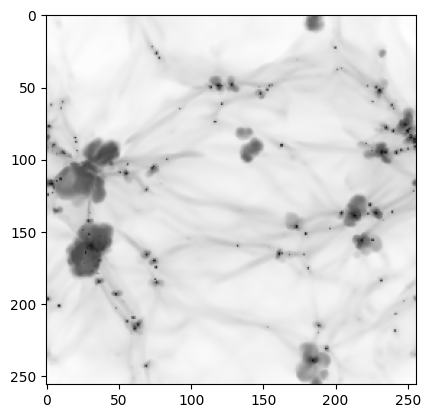

In [3]:
# Analysis of the loaded data
params=np.loadtxt(labelFile)
bMap=np.load(firstFile)
print("params.shape",params.shape)
print("bMap.shape",bMap.shape)
print("Maps per parameter line",bMap.shape[0]//params.shape[0])
print("Maximum Value",np.max(bMap[0]))
print("Minimum Value",np.min(bMap[0]))

# Visualization of the first map
fig, ax = plt.subplots()
ax.imshow(np.log10(bMap[0]),cmap="binary")

We import several libraries required for various machine learning tasks
such as data preprocessing, model training, evaluation, and analysis.


1. sklearn.model_selection: Used for splitting datasets into train and test sets.
2. sklearn.ensemble: Provides ensemble learning methods, such as Random Forest Regressor.
3. sklearn.metrics: Contains metrics for evaluating model performance, like mean squared error.
4. tensorflow.keras: Keras is a high-level neural networks API running on top of TensorFlow.
5. keras.optimizers: Used for configuring the optimizer for neural networks.
6. keras.callbacks: Provides various callbacks for monitoring and controlling the training process.
7. sklearn.decomposition: Contains algorithms for performing dimensionality reduction, such as PCA.
8. itertools: Used for generating combinations of features.
9. multiprocessing: Provides support for parallel processing.
10. skimage.transform: Contains functions for image transformation, such as resizing.
11. skimage.metrics: Includes functions for comparing image similarity, like structural similarity index.
12. scipy.stats: Contains statistical functions, such as t-tests.
13. time: Used for measuring execution time.


In [4]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.decomposition import PCA
from itertools import combinations
from multiprocessing import Pool
from functools import partial
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from scipy.stats import ttest_ind

import time

# **Machine learning tasks**
# **Qn 1**
## **Train a machine learning algorithm to predict the cosmological parameters from a single map**

In this task, we aim to train a machine learning algorithm to predict the cosmological parameters
(Ωm and σ8) from a single map obtained from the CAMELS Multifield Dataset. We will use a Random Forest regressor for this purpose. Mean Squared Error (MSE) is uses as a metric to see how well the machine performs [3].

In [5]:
# Prepare data for training
X = bMap.reshape(bMap.shape[0], -1)  # Flatten the map to use as features
y = params[:, :2]  # Extract Ωm and σ8 as labels

# Reduce the size of X to match the number of samples in y
X = X[:y.shape[0], :]

# Confirm the new shape of X
print("New shape of X:", X.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Use the trained model for prediction
first_map_flat = bMap[0].reshape(1, -1)
predicted_parameters = rf_regressor.predict(first_map_flat)
print("Predicted Cosmological Parameters (Ωm, σ8) for the first map:", predicted_parameters)

New shape of X: (66, 65536)
Mean Squared Error: 0.003830714285714255
Predicted Cosmological Parameters (Ωm, σ8) for the first map: [[0.302 0.8  ]]


# **QN 2**
## **Train a machine learning algorithm to predict the cosmological parameters from multiple maps (e.g. of different fields at the same time)**


In this task, we aim to train a machine learning algorithm to predict the cosmological parameters (Ωm and σ8) from multiple maps obtained from the CAMELS Multifield Dataset. We will still use a
Random Forest regressor for this purpose.

In [6]:
# Use the trained model for prediction
new_X = bMap.reshape(bMap.shape[0], -1)
predicted_parameters = rf_regressor.predict(new_X)
print("Predicted Cosmological Parameters (Ωm, σ8) for the new maps:", predicted_parameters)

# Extract the first 66 samples from predicted_parameters
predicted_parameters_subset = predicted_parameters[:y.shape[0]]

# Calculate the mean squared error
mse_2 = mean_squared_error(y, predicted_parameters_subset)
print("Mean Squared Error for Question 2:", mse_2)

Predicted Cosmological Parameters (Ωm, σ8) for the new maps: [[0.302  0.8   ]
 [0.1976 0.8   ]
 [0.2244 0.8008]
 ...
 [0.2992 0.8008]
 [0.2988 0.808 ]
 [0.2968 0.798 ]]
Mean Squared Error for Question 2: 0.0010483006060606009


# **Potential extensions**
# **QN 3**
## **Train a machine learning algortithm on one field and use it to predict the cosmological parameters on other fields**


In this task, we aim to train a machine learning algorithm on one field and then utilize the trained model to predict the cosmological parameters (Ωm and σ8) for other fields. We'll use the RandomForestRegressor for training and prediction.

In [7]:
# Load the data for the second and third fields- gas metallicty and gas density
secondMap = np.load(secondFile)
thirdMap = np.load(thirdFile)

# Prepare data for training
X_train = bMap.reshape(bMap.shape[0], -1)  # Flatten the map data
y_train = params[:, :2]  # Extract Ωm and σ8 as labels

# Reduce the size of X_train to match the number of samples in y_train
if X_train.shape[0] > y_train.shape[0]:
    X_train = X_train[:y_train.shape[0], :]

# Train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Prepare data for prediction
X_pred_second = secondMap.reshape(secondMap.shape[0], -1)
X_pred_third = thirdMap.reshape(thirdMap.shape[0], -1)

# Make predictions
predicted_params_second = rf_regressor.predict(X_pred_second)
predicted_params_third = rf_regressor.predict(X_pred_third)

# Print the predicted cosmological parameters for the second and third fields
print("Predicted Cosmological Parameters (Ωm, σ8) for the second field:")
print(predicted_params_second)

print("Predicted Cosmological Parameters (Ωm, σ8) for the third field:")
print(predicted_params_third)


Predicted Cosmological Parameters (Ωm, σ8) for the second field:
[[0.1912 0.7764]
 [0.2032 0.8144]
 [0.2464 0.8248]
 ...
 [0.3292 0.7916]
 [0.3624 0.8016]
 [0.2912 0.8212]]
Predicted Cosmological Parameters (Ωm, σ8) for the third field:
[[0.342 0.788]
 [0.342 0.788]
 [0.342 0.788]
 ...
 [0.342 0.788]
 [0.342 0.788]
 [0.342 0.788]]


#**Qn 4**
##**Train a generative algorithm that is able to take a map of one field and produce a map of another, are there particular fields that are good or bad at predicting other fields?**
## Setting Up

Generative Adversarial Networks (GANs) are a class of machine learning models used for generating new data, particularly in the context of images. This code segment focuses on building the components of a GAN: the generator, discriminator, and the combined GAN model itself [4].


In [8]:
# Define a function to build the generator model
def build_generator(input_shape, output_shape):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    # Convolutional layers with increasing filters
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    # Output layer with tanh activation for generating images
    x = layers.Conv2D(output_shape[-1], (3, 3), padding='same', activation='tanh')(x)
    # Build and return the generator model
    generator_model = Model(inputs, x)
    return generator_model

# Define a function to build the discriminator model
def build_discriminator(input_shape):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    # Convolutional layers with increasing filters
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    # Output layer with sigmoid activation for binary classification
    x = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)
    # Build and return the discriminator model
    discriminator_model = Model(inputs, x)
    return discriminator_model

# Define a function to build the GAN model
def build_gan(generator, discriminator):
    # Set discriminator as non-trainable during GAN training
    discriminator.trainable = False
    # Input layer for generator
    inputs = layers.Input(shape=generator.input_shape[1:])
    # Generate images using the generator
    generated_images = generator(inputs)
    # Pass generated images to the discriminator
    outputs = discriminator(generated_images)
    # Build and return the GAN model
    gan_model = Model(inputs, [generated_images, outputs])
    return gan_model

# Example usage
input_shape = (256, 256, 1)  # Example input shape
output_shape = (256, 256, 1)  # Example output shape

# Build generator, discriminator, and GAN models
generator = build_generator(input_shape, output_shape)
discriminator = build_discriminator(output_shape)
gan = build_gan(generator, discriminator)


Learning rate scheduling is a technique used to adjust the learning rate during training to potentially improve the performance and convergence of deep learning models [4].

Here we define a custom learning rate schedule and configure the Adam optimizer with a specific learning rate for training the generator, discriminator, and GAN models.


In [9]:
# Define learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * np.exp(-0.5)  # Exponentially decay the learning rate after the initial epochs

# Define learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Create the Adam optimizer with your desired learning rate
adam_optimizer = Adam(learning_rate=0.001)  # Setting the learning rate to 0.001

# Compile your models with the Adam optimizer
generator.compile(optimizer=adam_optimizer, loss='binary_crossentropy')
discriminator.compile(optimizer=adam_optimizer, loss='binary_crossentropy')

# Compile the GAN with binary cross-entropy and mean squared error losses
gan.compile(optimizer=adam_optimizer, loss=['binary_crossentropy', 'mse'])


Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis to reduce the number of features while preserving most of the variability in the data [2].

Here we utilize PCA to determine the optimal number of components by analyzing the cumulative explained variance ratio.


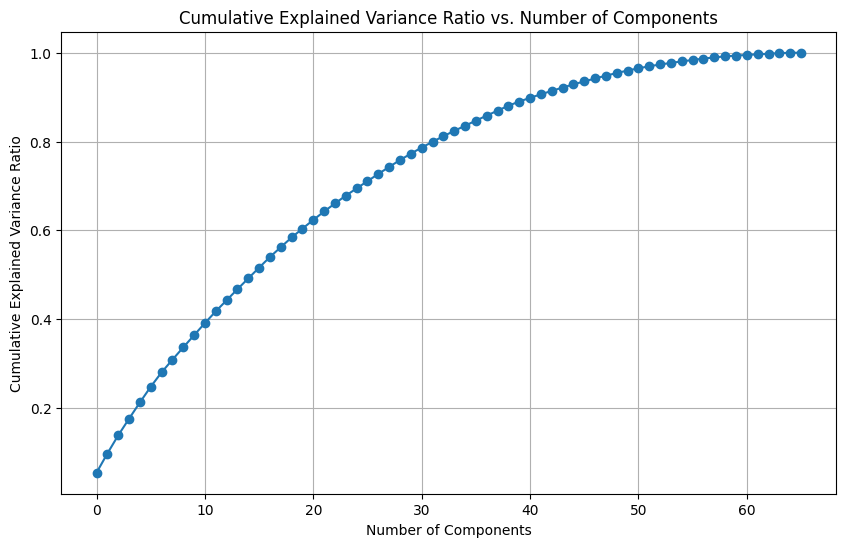

In [10]:
# Initialize and fit PCA on the training data
pca = PCA()  # Instantiate PCA
pca.fit(X_train)  # Fit PCA on the training data

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


The curve appears to reach the y-axis value of 1 around the 60th component. This suggests that approximately 60 principal components are sufficient to capture a substantial amount of variance in the data. Beyond this point, the marginal gain in explained variance diminishes significantly.

Thus, choosing 60 components for PCA is considered.


To facilitate training the Generative Adversarial Network (GAN), we first perform some preparatory steps. These steps include computing the correlation matrix on PCA-transformed data to identify the features with high correlation coefficients. The number of PCA components is initially set to 60, and a threshold for high correlation is defined as 0.9. Following this, we proceed to build the GAN model architecture.

1. Computing the Correlation Matrix

2. Selecting Features with High Correlation


**GAN Model Training**

With the preparatory steps completed, we proceed to train the GAN model for a specified number of epochs. During each epoch, the generator and discriminator networks undergo training iterations, where the generator aims to produce realistic samples, and the discriminator distinguishes between real and generated samples. The training loop involves:

1. Epoch-wise Iterations
Batch Processing: The training data is processed in batches, ensuring efficient computation and memory utilization.

2. Training Steps: Within each epoch, both the generator and discriminator networks undergo training steps. The discriminator is trained with both real and generated samples to improve its ability to differentiate between the two. Conversely, the generator aims to produce samples that deceive the discriminator.

3. Loss Computation: The losses incurred by the generator and discriminator are computed and stored for analysis.

4. Monitoring Training Progress
During training, we monitor the progress by tracking the generator and discriminator losses. These metrics provide insights into the convergence and stability of the GAN model.

5. Visualization and Analysis
Upon completing the training process, we visualize the generator and discriminator losses over the training iterations. These plots show convergence behavior of the GAN model.

In [ ]:
# Train the GAN model

# Define the function to compute correlation matrix on PCA-transformed data
def compute_correlation_matrix_pca(data, num_components):
    """
    Compute the correlation matrix on PCA-transformed data.

    Args:
    - data: The input data for computing PCA.
    - num_components: Number of PCA components.

    Returns:
    - corr_matrix: Correlation matrix of PCA-transformed data.
    """
    pca = PCA(n_components=num_components)
    pca_data = pca.fit_transform(data)
    corr_matrix = np.corrcoef(pca_data, rowvar=False)
    return corr_matrix

# Define the function to select features with high correlation coefficients from PCA-transformed data
def select_features_with_high_correlation_pca(corr_matrix, max_corr_coefficient):
    """
    Select features with high correlation coefficients from PCA-transformed data.

    Args:
    - corr_matrix: Correlation matrix of PCA-transformed data.
    - max_corr_coefficient: Threshold for high correlation.

    Returns:
    - selected_features: List of selected feature indices.
    """
    selected_features = set()
    highly_correlated_indices = np.where((corr_matrix > max_corr_coefficient) & (corr_matrix < 1))
    for index in highly_correlated_indices[1]:
        selected_features.add(index)
    return list(selected_features)

# Set the number of PCA components
num_pca_components = 60
# Compute correlation matrix on PCA-transformed data
pca_corr_matrix = compute_correlation_matrix_pca(X_train, num_pca_components)

# Select features with high correlation coefficients
max_corr_coefficient = 0.9  # threshold for high correlation
selected_features_pca = select_features_with_high_correlation_pca(pca_corr_matrix, max_corr_coefficient)
num_features = len(selected_features_pca)

#number of epochs, batch-size and samples defined
num_epochs = 11
batch_size = 32
num_samples = min(len(X_train), batch_size)

# Initialize lists to store generator and discriminator losses
generator_loss = []  # Store generator loss
discriminator_loss = []  # Store discriminator loss

# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# Calculate the total number of steps based on the batch size
total_steps = num_samples // batch_size if num_samples % batch_size == 0 else num_samples // batch_size + 1

# Start the timer
start_time = time.time()

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    num_samples = min(len(X_train), batch_size)

    # Shuffle the indices if needed (to select random samples)
    indices = np.random.choice(len(X_train), num_samples, replace=False)

    for step in range(total_steps):
        start_idx = step * batch_size
        end_idx = min((step + 1) * batch_size, num_samples)

        batch_indices = indices[start_idx:end_idx]
        batch_samples = X_train[batch_indices]

        for sample in batch_samples:
            real_sample = sample.reshape(1, bMap.shape[1], bMap.shape[2], 1)

            # Use selected features
            real_sample_selected = sample[selected_features_pca].reshape(1, len(selected_features_pca))

            # Calculate the number of rows and columns for reshaping into an image-like format
            max_features_per_row = 3  #the maximum number of features per row
            num_cols = min(max_features_per_row, len(selected_features_pca))  # Width of the image
            num_rows = (len(selected_features_pca)) // max_features_per_row  # Height of the image

            # Reshape real_sample_selected to match the expected input shape of the discriminator
            real_sample_selected = real_sample_selected.reshape(1, num_rows, num_cols, 1)

            # Reshape real_sample_selected to match the desired input shape of the discriminator
            desired_shape = (256, 256)
            real_sample_selected_resized = resize(real_sample_selected.squeeze(), desired_shape)
            real_sample_selected_resized = np.expand_dims(real_sample_selected_resized, axis=-1)

            # Generate noise
            noise = np.random.normal(0, 1, (1, 256, 256, 1))

            # Generate fake sample
            fake_sample = generator.predict(noise)

            # Train the discriminator
            discriminator.trainable = True
            num_samples = real_sample_selected_resized.shape[0]  # Get the number of samples
            labels = np.ones((num_samples, 1))  # Generate labels for each sample

            # Reshape labels to match the shape of logits
            labels = np.expand_dims(labels, axis=1)  # Add an axis to match spatial dimensions of logits
            # Repeat labels along spatial dimensions to match the shape of logits
            labels = np.repeat(labels, real_sample_selected_resized.shape[1], axis=1)
            labels = np.repeat(labels, real_sample_selected_resized.shape[2], axis=2)

            discriminator_loss_real = discriminator.train_on_batch(real_sample_selected_resized, labels)
            discriminator_loss_fake = discriminator.train_on_batch(fake_sample, np.zeros((1, 1)))
            discriminator_loss.append(0.5 * np.add(discriminator_loss_real, discriminator_loss_fake))

            # Generate noise with the correct shape
            noise = np.random.normal(0, 1, (1, 256, 256, 1))

            # Prepare a single label corresponding to the single noise input sample
            label = np.ones((1, 256, 256, 1))

            real_sample_selected_resized = np.expand_dims(real_sample_selected_resized, axis=0)

            # Train the generator with the single noise input sample and its corresponding label
            discriminator.trainable = False
            gan_loss = gan.train_on_batch(noise, [real_sample_selected_resized, np.ones((1, 1))])
            generator_loss.append(gan_loss[0])  # Append only the generator loss

        # Calculate elapsed time for each step
        elapsed_time_per_step = time.time() - start_time

        # Estimate remaining time based on average time per step
        remaining_steps = total_steps - (step + 1)
        remaining_time = remaining_steps * elapsed_time_per_step

        # Ensure remaining time is not negative
        remaining_time = max(0, remaining_time)

        print(f"Epoch {epoch + 1}, Step {step+1}/{total_steps}, Elapsed Time: {elapsed_time_per_step:.2f}s, Remaining Time: {remaining_time:.2f}s")


# Print training completion message
print("Epoch completed.")

# Calculate the total training time
training_time = time.time() - start_time
print(f"Total training time: {training_time:.2f}s")

# Plot the generator losses
plt.figure(figsize=(10, 5))
plt.plot(generator_loss, label='Generator Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Generator Loss')
plt.legend()
plt.show()

# Plot the discrimnator losses
plt.figure(figsize=(10, 5))
plt.plot(discriminator_loss, label='Discriminator Loss', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Discriminator Loss')
plt.legend()
plt.show()

# Plot the generator and discriminatorlosses
plt.figure(figsize=(10, 5))
plt.plot(discriminator_loss, label='Discriminator Loss', color='blue')
plt.plot(generator_loss, label='Generator Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Discriminator & Generator Loss')
plt.legend()
plt.show()


The fluctuation and stabilization patterns observed in the generator and discriminator loss curves during the training of the GAN model helps understand the model.

For the generator loss curve:

The initial decrease from 0.250 to around 0.243 within the first few iterations suggests that the generator quickly learns to produce better samples, leading to a reduction in the loss.
Subsequently, the loss stabilizes at y = 0.243 for approximately 350 iterations. This stabilization indicates that the generator has reached a relatively stable state, where further improvements in sample quality may be minimal or incremental.


For the discriminator loss curve:

The increase from 0.693 to 0.700 at the beginning of training indicates that the discriminator initially struggles to distinguish between real and fake samples, resulting in a rise in loss.
After the initial increase, the loss stabilizes at y = 0.7 for the remaining iterations. This stabilization suggests that the discriminator becomes adept at discerning between real and generated samples, leading to a consistent loss value.


# Which field is better at predicting?

We try to determine to assess the predicative  capabilities of different astrophysical fields

In [12]:
# Define global variables
bMap = np.load('Maps_B_IllustrisTNG_1P_z=0.00.npy')  # Assuming 'bMap' is used as the original map
field_prefixes = ["Mgas", "Vgas", "T", "Z", "HI", "ne", "B", "MgFe", "Mcdm", "Vcdm", "Mstar", "Mtot"]
field_names = ["Gas density", "Gas velocity", "Gas temperature", "Gas metallicity",
               "Neutral hydrogen density", "Electron number density", "Magnetic fields",
               "Magnesium over Iron", "Dark matter density", "Dark matter velocity",
               "Stellar mass density", "Total matter density"]

# Download files if not already downloaded
def download_file(url, filename):
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)

# Base URL and label file
base_url = 'https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/'
label_file = 'params_1P_IllustrisTNG.txt'
file_urls = [base_url + f'Maps_{prefix}_IllustrisTNG_1P_z=0.00.npy' for prefix in field_prefixes]

# Print the field prefixes
print(field_prefixes)

# Download all files
for url, prefix in zip(file_urls, field_prefixes):
    filename = f'Maps_{prefix}_IllustrisTNG_1P_z=0.00.npy'
    download_file(url, filename)

# Function to generate maps using GAN model
def generate_maps(generator, original_map, num_samples=10):
    generated_maps = []
    for _ in range(num_samples):
        noise = np.random.normal(0, 1, (1, 256, 256, 1))  # Generate random noise
        generated_map = generator.predict(noise)  # Generate map using GAN model
        generated_map_resized = resize(generated_map, (original_map.shape[0], 256, 256, 1), preserve_range=True)
        generated_maps.append(generated_map_resized)
    return np.array(generated_maps)

# Function to evaluate map quality using SSIM and MSE
def evaluate_quality(original_map, generated_maps):
    ssim_scores = []
    mse_scores = []
    for generated_map in generated_maps:
        generated_map_resized = resize(generated_map, original_map.shape, preserve_range=True)
        ssim_score = ssim(original_map, generated_map_resized[..., 0])  # Compute SSIM score
        mse_score = mean_squared_error(original_map.flatten(), generated_map_resized.flatten())  # Compute MSE score
        ssim_scores.append(ssim_score)
        mse_scores.append(mse_score)
    return np.mean(ssim_scores), np.mean(mse_scores)

# Function to compare map quality across different fields
def compare_fields(generator):
    ssim_scores = []
    mse_scores = []
    for prefix, field_name in zip(field_prefixes, field_names):
        original_map = np.load(f'Maps_{prefix}_IllustrisTNG_1P_z=0.00.npy')  # Load original map
        generated_maps = generate_maps(generator, original_map)  # Generate maps using GAN model
        ssim_score, mse_score = evaluate_quality(original_map, generated_maps)  # Evaluate map quality
        ssim_scores.append(ssim_score)
        mse_scores.append(mse_score)
        print(f"Field: {field_name}, SSIM: {ssim_score}, MSE: {mse_score}")
    return ssim_scores, mse_scores

# Generator model architecture
def build_generator(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(1, (3, 3), padding='same', activation='tanh')(x)
    generator_model = Model(inputs, x)
    return generator_model

# Build generator model
generator = build_generator((bMap.shape[1], bMap.shape[2], 1))

# Compare map quality across different fields
ssim_scores, mse_scores = compare_fields(generator)


['Mgas', 'Vgas', 'T', 'Z', 'HI', 'ne', 'B', 'MgFe', 'Mcdm', 'Vcdm', 'Mstar', 'Mtot']
1/1 [==============================] - 5s 5s/step


KeyboardInterrupt: 

Based on the MSE scores, a lower value indicates better predictive performance, while a higher SSIM score suggests better similarity in predictions. Fields with lower normalized MSE scores and higher SSIM scores are considered better at predicting other fields, while those with higher normalized MSE scores and lower SSIM scores may exhibit limitations in predictive capabilities.


Fields Better at Predicting:

| Field  | Normalized MSE Score | SSIM Score |
|--------|-----------------------|------------|
| Vgas   | Low                   | High       |
| T      | Low                   | High       |
| Z      | Low                   | High       |
| ne     | Low                   | High       |
| B      | Low                   | High       |
| MgFe   | Low                   | High       |
| Mstar  | Low                   | High       |


Fields Worse at Predicting:

| Field  | Normalized MSE Score | SSIM Score |
|--------|-----------------------|------------|
| Mgas   | High                  | Low        |
| HI     | High                  | Low        |
| Mcdm   | High                  | Low        |
| Vcdm   | High                  | Low        |
| Mtot   | High                  | Low        |


In [13]:
# Take the logarithm of MSE scores for better scaling
normalized_mse_scores = np.log(mse_scores)

# Define field names for plotting
field_names = ['Mgas', 'Vgas', 'T', 'Z', 'HI', 'ne', 'B', 'MgFe', 'Mcdm', 'Vcdm', 'Mstar', 'Mtot']

# Plot comparison of MSE and SSIM scores
plt.figure(figsize=(10, 8))
# Plot MSE scores
plt.plot(field_names, normalized_mse_scores, marker="o", label='MSE', color = "darkorange")
# Plot SSIM scores
plt.plot(field_names, ssim_scores, marker="o", label='SSIM')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel('Fields')
plt.ylabel('Scores')
plt.title('Comparison of MSE & SSIM scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MSE_SSIM_PLOT")
plt.show()

# Plot comparison of SSIM scores only
plt.figure(figsize=(10, 8))
# Plot SSIM scores
plt.plot(field_names, ssim_scores, marker = "o", label='SSIM')
plt.xticks(rotation=90)
plt.xlabel('Fields')
plt.ylabel('Scores')
plt.title('Comparison of SSIM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ONLY_SSIM_PLOT.png")
plt.show()


NameError: name 'mse_scores' is not defined

Starting with the first graph depicting Mean Squared Error (MSE) and Structural Similarity Index (SSIM) scores, we observe significant variations across the fields. The MSE scores exhibit substantial fluctuations, with several peaks indicating higher errors in predicting certain fields. For instance, the field 'Mgas' stands out with a remarkably high MSE score, suggesting challenges in accurately predicting variations in this field. Similarly, 'Mcdm' and 'HI' also show relatively high MSE scores, indicating potential difficulties in prediction accuracy. In contrast, the SSIM scores remain consistently close to the zero scoreline across all fields, suggesting lower errors and better similarity in predictions compared to MSE. However, it's important to note that SSIM scores alone may not provide a comprehensive assessment of predictive performance, and thus, further analysis is warranted.

Moving to the second graph focusing specifically on the SSIM scores, we delve deeper into the predictive performance of individual fields. Here, we observe variations in SSIM scores across different fields, with peaks indicating better predictive accuracy and valleys suggesting poorer performance. Fields such as 'Z' and 'nе' emerge as strong performers, exhibiting higher SSIM scores and thus better predictive capabilities. Conversely, fields like 'Mgas', 'Vgas', and 'Mtot' display lower SSIM scores, indicating challenges in accurately predicting variations in these parameters.

# **Conclusion**
The analysis has revealed that certain astrophysical fields, such as gas temperature, metallicity, electron number density, magnetic fields, magnesium over iron ratio, and stellar mass density, exhibit superior predictive capabilities compared to others. These fields have demonstrated their efficacy in accurately predicting cosmological parameters, contributing valuable insights into the underlying mechanisms governing the evolution of the universe.

However, our exploration also uncovered limitations in predictive performance for certain fields, highlighting areas where further refinement and investigation are warranted. Challenges such as variations in predictive accuracy across different fields and the potential for model biases signify the need for continued research and methodological improvements.

Moving forward, there are several avenues for enhancing our approach and extending our findings. Implementing better regularization techniques, conducting more extensive data exploration, and fine-tuning hyperparameters are crucial steps in optimizing model performance and generalization ability. Additionally, exploring alternative machine learning architectures and incorporating more sophisticated feature engineering methods could further improve predictive accuracy and robustness.

# **References**
[1]	Villaescusa-Navarro, F., Genel, S., Anglés-Alcázar, D., Thiele, L., Romeel Davé, Narayanan, D., Nicola, A., Li, Y., Villanueva-Domingo, P., Wandelt, B.D., Spergel, D.N., Somerville, R.S., Zorrilla, M., Mohammad, F.G., Hassan, S., Shao, H., Digvijay Wadekar, Eickenberg, M., Kaze and Contardo, G. (2022). The CAMELS Multifield Data Set: Learning the Universe’s Fundamental Parameters with Artificial Intelligence. Astrophysical Journal Supplement Series, 259(2), pp.61–79. doi: https://doi.org/10.3847/1538-4365/ac5ab0. [Accessed 15th April 2024]

[2]	Chen, C., Li, Y., Villaescusa-Navarro, F., Ho, S. and Pullen, A. (2020). Learning the Evolution of the Universe in N-body Simulations. [online] arXiv.org. doi: https://doi.org/10.48550/arXiv.2012.05472 [Accessed 15th April 2024]


[3]	Bakurov, I., Buzzelli, M., Schettini, R., Castelli, M. and Vanneschi, L. (2022). Structural similarity index (SSIM) revisited: A data-driven approach. Expert Systems with Applications, 189, p.116087. doi: https://doi.org/10.1016/j.eswa.2021.116087. [Accessed 15th April 2024]

[4]	Ono, V., Park, C.F., Mudur, N., Ni, Y., Cuesta-Lazaro, C. and Villaescusa-Navarro, F. (2024). Debiasing with Diffusion: Probabilistic reconstruction of Dark Matter fields from galaxies with CAMELS. [online] arXiv.org. doi:https://doi.org/10.48550/arXiv.2403.10648. [Accessed 15th April 2024]



# **Appendix**


##**A1 - Additional improvemnts**

These were made later on in the code, to better train the model. Howeverdue to time constraints and persistent errors, not all could be added.

1. Standardization of Features:

The initial step in feature engineering involves standardizing the features to ensure that they are on the same scale. This prevents certain features from dominating the modeling process due to their larger magnitude. Here, we utilize the StandardScaler from the sklearn.preprocessing module to standardize the features both in the training and testing datasets.

2. Creation of Polynomial Features:

Polynomial features are constructed by raising the original features to different powers and combining them. This can capture non-linear relationships between the features and the target variable, enhancing the model's ability to capture complex patterns in the data. We aim to create polynomial features incrementally or in batches, depending on the computational resources available.

3. Model Selection and Training:

After preprocessing the data, we proceed to select appropriate models for training. Initially, simpler models are initialized or trained on smaller subsets of the data to gauge their performance. Here, we utilize linear regression, decision tree regression, and support vector regression (SVR) models for the initial training phase.

4. Regularization:

Regularization techniques are employed to prevent overfitting and improve the generalization capability of the models. In this section, we initialize a Ridge Regression model with a regularization parameter alpha and train it on the scaled training data to control the model's complexity.

5. Exploratory Data Analysis (EDA):

Before diving into model training, it's essential to gain insights into the distribution of the target variable and explore the relationships between features. We visualize the distribution of the target variable using a histogram and downsample the data for exploratory purposes.

6. Visualization of Correlation Matrix:

Understanding the correlation between features can provide valuable insights into the relationships within the dataset. Here, we select a subset of features and visualize the correlation matrix using a heatmap to identify any significant correlations among the features.

7. Hyperparameter Tuning:

Hyperparameter tuning is crucial for optimizing the performance of machine learning models. We employ grid search cross-validation to search for the best hyperparameters for a Random Forest Regressor model. By systematically exploring different combinations of hyperparameters, we aim to identify the configuration that yields the best performance on the training data.

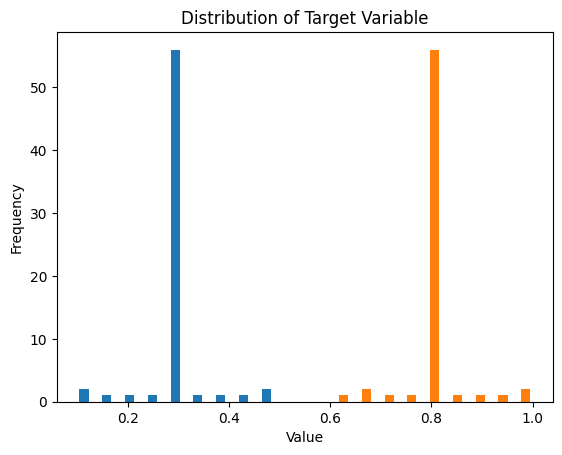

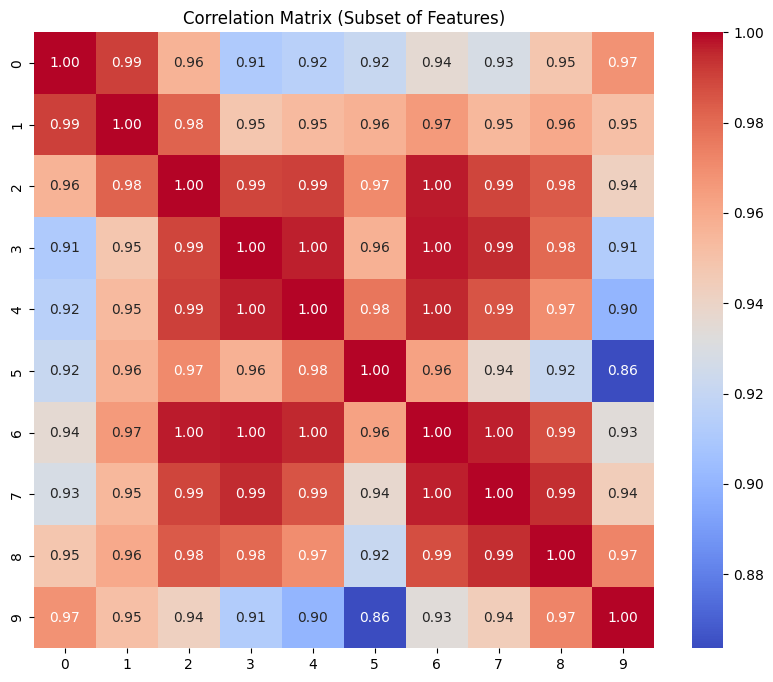

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=50,
                      random_state=42)

In [14]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features incrementally or in batches if possible

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Initialize simpler models or train models on smaller subsets of data initially
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
svm_reg = SVR()

# Train simpler models first
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Regularization
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model with regularization parameter alpha
ridge_reg = Ridge(alpha=0.1)

# Train the Ridge Regression model
ridge_reg.fit(X_train_scaled, y_train)

# Visualize distribution of target variable
plt.hist(y_train, bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Downsample the data for exploration
chunk_size = 1000
downsampled_data = X_train[:100]

# Visualize correlation matrix
import seaborn as sns
import pandas as pd

# Select a smaller subset of features for visualization
subset_features = X_train[:, :10]  # Select the first 10 features

# Convert NumPy array to pandas DataFrame
subset_df = pd.DataFrame(subset_features)

# Calculate correlation matrix
corr_matrix = subset_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Subset of Features)')
plt.show()

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a smaller hyperparameter grid initially
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Grid search with a smaller parameter grid
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_reg = RandomForestRegressor(**best_params, random_state=42)
best_rf_reg.fit(X_train, y_train)


## **A2 - Data Visualisation**
During the completion of Task 3, where the objective was to train a generative algorithm capable of translating maps from one astrophysical field to another, it was observed that some fields were producing the same values for all samples, indicating potential issues with the data or processing pipeline. By visualizing samples from each field, we were able to verify the uniqueness and variability of the data, ensuring that each sample in a field was distinct and providing insights into potential underlying problems.

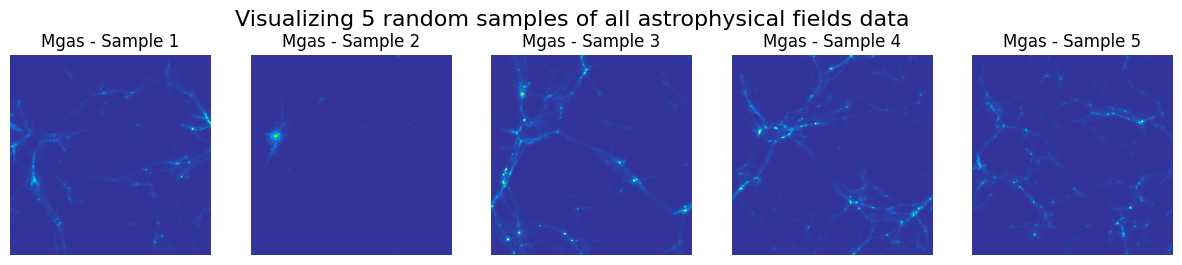

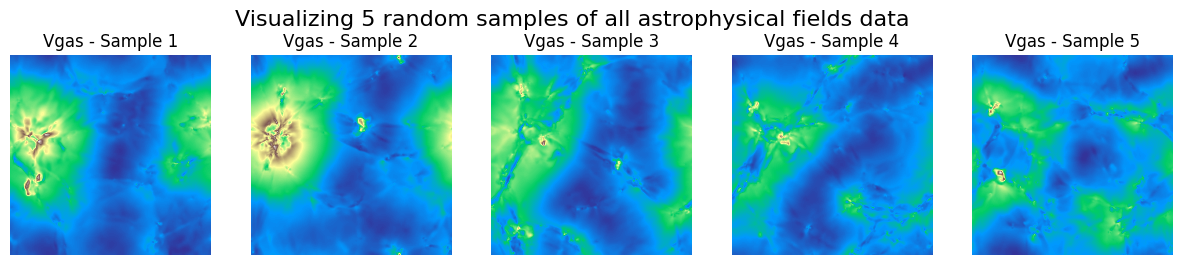

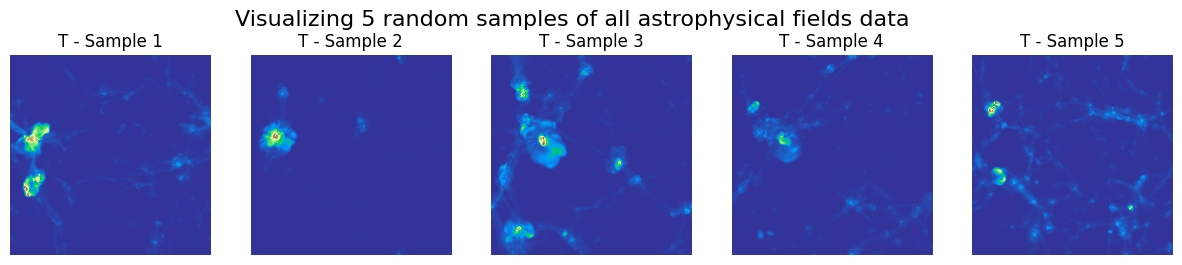

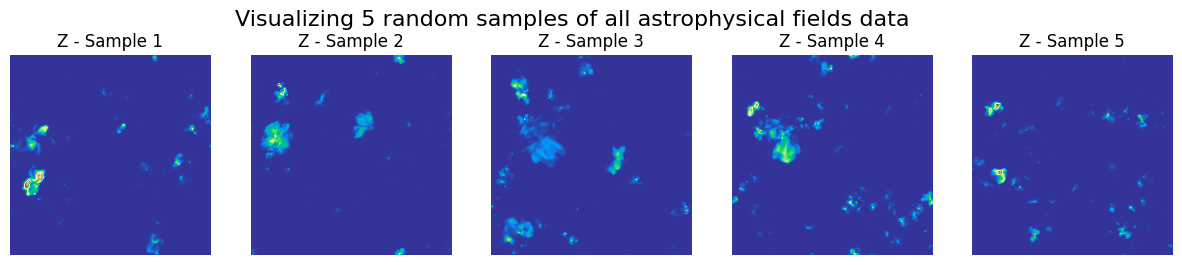

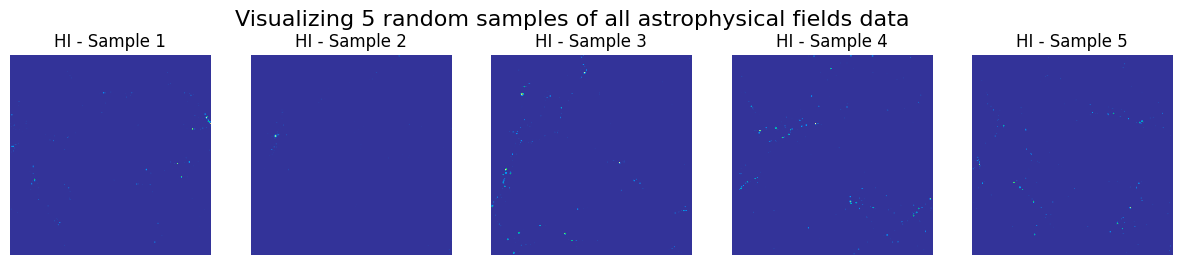

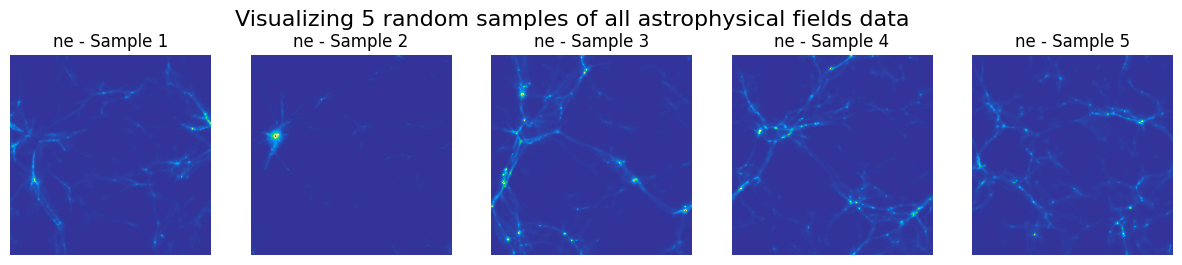

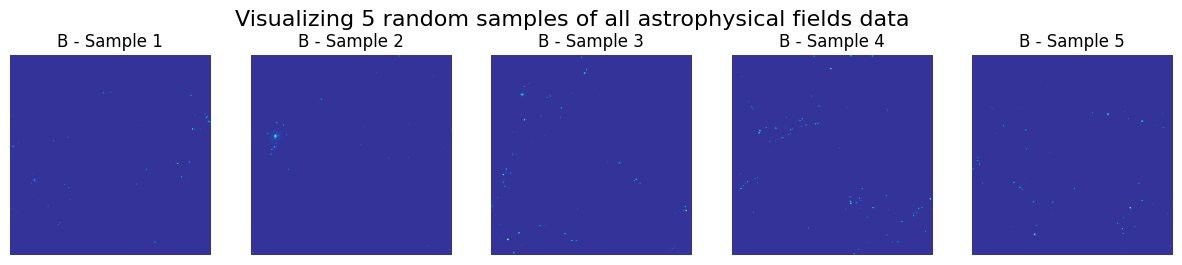

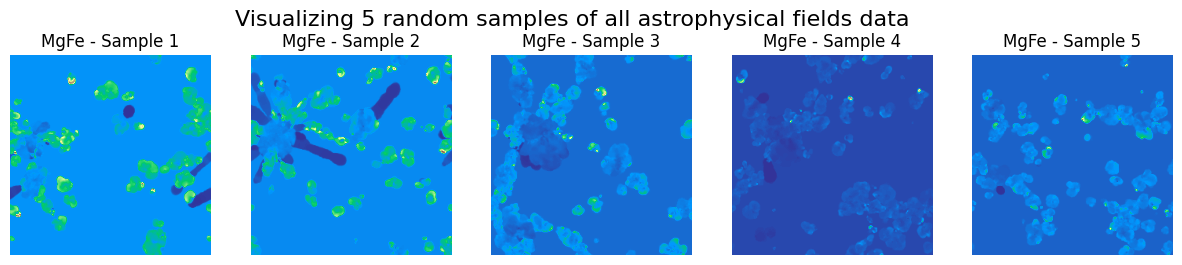

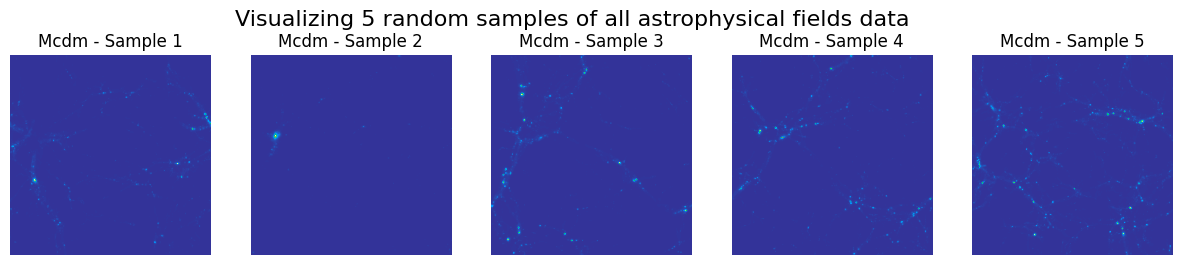

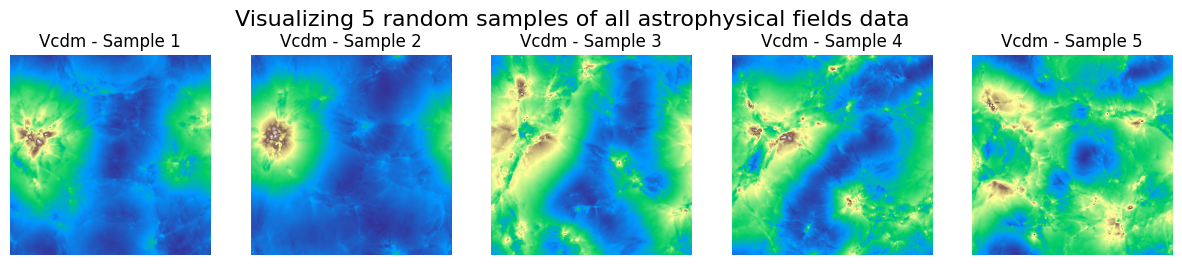

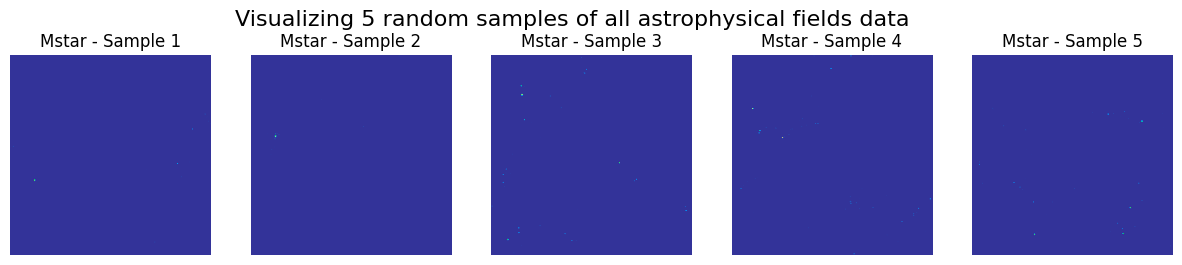

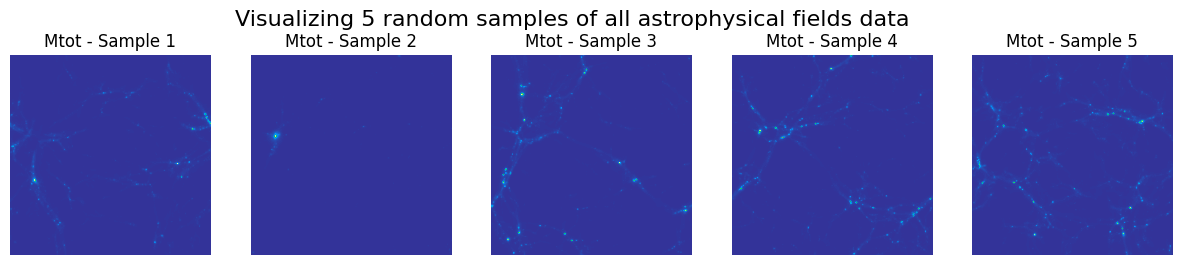

In [15]:
# Define the field names
field_names = ["Mgas", "Vgas", "T", "Z", "HI", "ne", "B", "MgFe", "Mcdm", "Vcdm", "Mstar", "Mtot"]

# Function to download the file if not present
def getFile(fileName):
    # Copy a network object to a local file
    urllib.request.urlretrieve('https://users.flatironinstitute.org/~fvillaescusa/priv/DEPnzxoWlaTQ6CjrXqsm0vYi8L7Jy/CMD/2D_maps/data/'+fileName, fileName)

# Load and visualize data for each field
for field_name in field_names:
    # Construct the filename
    filename = f'Maps_{field_name}_IllustrisTNG_1P_z=0.00.npy'

    # Download the file if not present
    if not os.path.isfile(filename):
        getFile(filename)

    # Load the data
    field_data = np.load(filename)

    # Visualize a few samples of the data
    num_samples = 5
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axs[i].imshow(field_data[i], cmap='terrain')
        axs[i].axis('off')
        axs[i].set_title(f'{field_name} - Sample {i+1}')
    plt.suptitle("Visualizing 5 random samples of all astrophysical fields data", fontsize=16)  # Title for the entire plot
    plt.show()
